In [1]:
import gymnasium as gym
import os
import numpy as np
import sys
sys.path.append(r"C:\Users\Manan\OneDrive\Documents\orbit_project")

import orbit_optimization_project
from orbit_optimization_project.orbit_env.orbit_env import OrbitEnv

from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.logger import configure
from stable_baselines3.common.vec_env import DummyVecEnv

from orbit_optimization_project.orbit_env.orbit_env import OrbitEnv

gym.envs.registration.register(
    id='OrbitEnv-v0',
    entry_point='orbit_optimization_project.orbit_env.orbit_env:OrbitEnv',
)


C:\Users\Manan\anaconda3\Lib\site-packages\gymnasium\envs\registration.py:644: UserWarning: WARN: Overriding environment OrbitEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


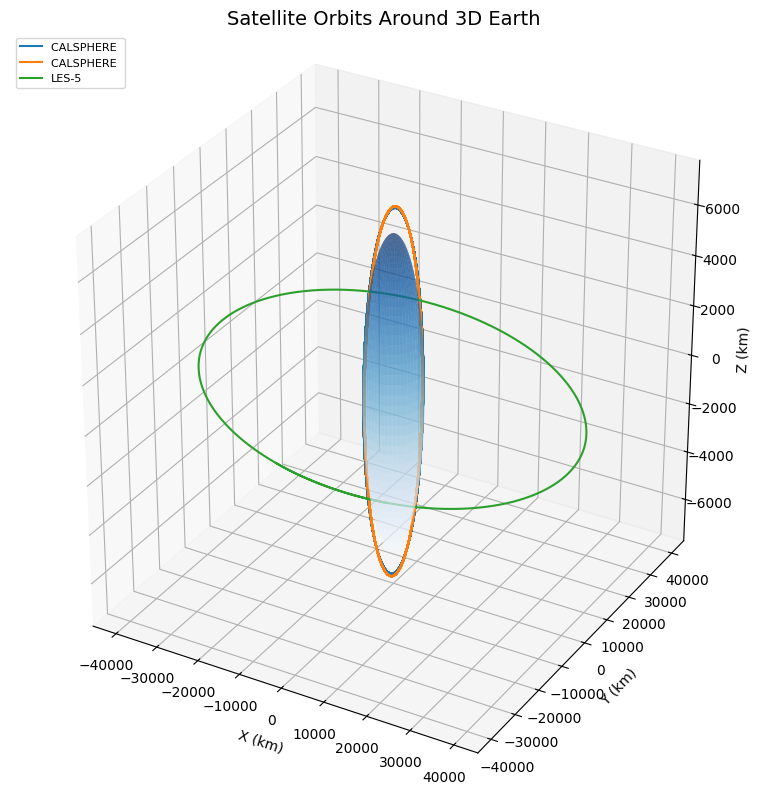

Plotted 7275 satellites within altitude range (700.0, 1550.0)



In [3]:
env = gym.make('OrbitEnv-v0')

In [5]:
env.action_space.sample()

array([7.9525688e+03, 7.3821463e-02, 3.0253947e+00, 6.1890268e+00,
       5.1733751e+00], dtype=float32)

In [7]:
vec_env = DummyVecEnv([lambda: env])

Logging to ./logs/


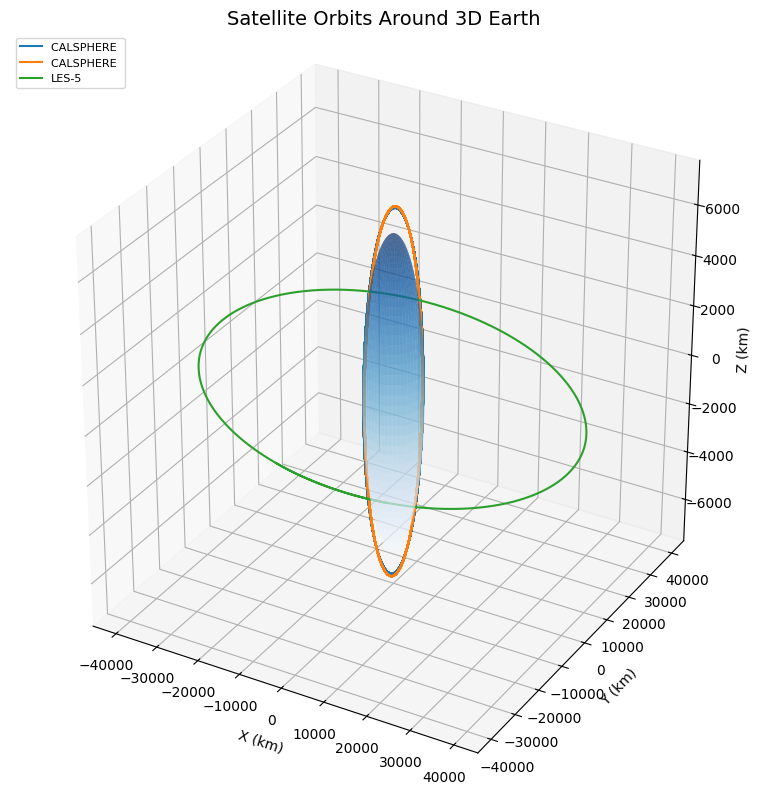

Plotted 7275 satellites within altitude range (700.0, 1550.0)



In [9]:
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

# Configuring logger to output logs to console and files
new_logger = configure(log_dir, ["stdout", "csv", "tensorboard"])

# Creating a separate evaluation environment
eval_env = gym.make('OrbitEnv-v0')

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=os.path.join(log_dir, "best_model"),
    log_path=log_dir,
    eval_freq=1000,
    deterministic=True,
    render=False,
)

In [11]:
model = PPO(
    "MultiInputPolicy",
    vec_env,
    verbose=1,
    tensorboard_log=log_dir,
)

model.set_logger(new_logger)


Using cuda device


In [13]:
model.learn(total_timesteps=500000, callback=eval_callback)

C:\Users\Manan\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:126: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.bool_'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
C:\Users\Manan\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
C:\Users\Manan\anaconda3\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-50000.00 +/- 0.00
Episode length: 500.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 500      |
|    mean_reward     | -5e+04   |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-50000.00 +/- 0.00
Episode length: 500.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 500      |
|    mean_reward     | -5e+04   |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
-----------------------------
| time/              |      |
|    fps             | 0    |
|    iterations      | 1    |
|    time_elapsed    | 2793 |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=-40713.88 +/- 0.00
Episode length: 500.00 +/- 0.00
-------------------

C:\Users\Manan\OneDrive\Documents\orbit_project\orbit_optimization_project\orbit_env\orbit_env.py:19: SyntaxWarning: invalid escape sequence '\ '
  """

KeyboardInterrupt



In [16]:
model.save("Orbit_prediction_RL_Model(timesteps=62000)")

In [18]:
import os
print(os.getcwd())


C:\Users\Manan


In [ ]:
env = gym.make("OrbitEnv-v0")
model = PPO.load("Orbit_prediction_RL_Model(timesteps=62000)")

obs, _ = env.reset()
action, _ = model.predict(obs, deterministic=True)

obs, reward, terminated, truncated, info = env.step(action)

print("Optimal orbit parameters:", action)
print("Reward:", reward)
print("Objectives met:", info.get('all_objectives_met', False))


In [24]:
print("Objectives met:", info['all_objectives_met'])

Objectives met: False
